# Data merge

In [ ]:
import os


imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

file_name=os.listdir("testing_data")
print(file_name)
path_of_fol='/home/ezio/Documents/internal_data_manupulation (1)/testing_data/'
combined_csv = pd.concat([pd.read_csv(path_of_fol+'/'+f) for f in file_name ])
combined_csv.to_csv( "/home/ezio/Documents/internal_data_manupulation (1)/testing_data/merged_data.csv", index=False, encoding='utf-8-sig')

# Data_transformation

In [1]:
import pandas as pd
import numpy as np
from itertools import islice


speed_avg=[]
rpm_avg=[]
mileage=[]
distance=[]
fuel_total=[]
engine_torque=[]

#File Reading
data=pd.read_csv(r'C:\Users\SARATHH\internal_data_manupulation (1)\testing_data\merged_data.csv')

data=data[['T','TFC','ODO','ALT']]

print(len(data))
def cap_data(df):
    for col in df.columns:
        print("capping the ",col)
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            percentiles = df[col].quantile([0.05,0.95]).values
            df.drop(df[(df[col] <= percentiles[0])].index,inplace=True)
            df.drop(df[(df[col] >= percentiles[1])].index,inplace=True)
            print(len(df))
        else:
            print('missing_column')
    return df   
datas=cap_data(data)

print(len(datas))
#final_df=cap_data(df)


datas.reset_index(inplace=True) 
datas.to_csv('outliers_non.csv')


dt_data=pd.to_datetime(datas['T'])
TFC_data=datas['TFC'].astype('str')            
start_index=0
#hour=[00,23]
#min=[00,59]
end_index=0
c=0
s=[]
e=[]
start_time=0
end_time=0
time_split_data=[]
for kk in range(0,len(dt_data)):
    #print(TFC_data[kk])
    if str(TFC_data[kk])!='nan':
        c+=1
        #print(c,'c')
    if str(TFC_data[kk]) != 'nan' and c==1:
        
        start_time=dt_data[kk]
        #print(start_time,'pppp')
        start_index=kk
        s.append(start_index)
    else:
        end_time=dt_data[kk]
        #print(start_time,'llll',end_time)
        if start_time!=0:
            dif=end_time-start_time
            #print(dif)
            h=abs(int(str(dif).split(' ')[2].split(':')[0]))
            #print(start_time,end_time,h)
            if h >=6 and str(TFC_data[kk]) != 'nan':

                end_index=kk

                time_split_data.append([abs(data['TFC'][end_index]-data['TFC'][start_index]),
                                           abs(data['ODO'][end_index]-data['ODO'][start_index]),
                                        data.loc[start_index:end_index]['ALT'].mean()])
                #print('alttttt',data.loc[start_index:end_index]['ALT'].mean())
                e.append(end_index)
                c=0
                                    

time_6_split=pd.DataFrame(time_split_data,columns=['TFC','ODO','ALT'])

time_6_split['AFE']=time_6_split['ODO']/time_6_split['TFC']

time_6_split['AFE']=time_6_split['AFE'].astype('str')
time_6_split=time_6_split[time_6_split['AFE']!='nan']
time_6_split['AFE']=time_6_split['AFE'].astype('float')
#time_6_split['AFE']=time_6_split/100
time_6_split.reset_index(drop=True, inplace=True)
time_6_split.index.name='ind'
time_6_split['AFE']=time_6_split['AFE']/1000
time_6_split.to_csv('time_gap_6hourss.csv')

print(s[:10],e[:10])   








C:\Users\SARATHH\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


100490
capping the  T
missing_column
capping the  TFC
100240
capping the  ODO
92098
capping the  ALT
82888
82888
[4, 384, 1143, 2575, 4055, 7124, 10194, 13576, 14724, 16731] [380, 1121, 2552, 4000, 7108, 10187, 13545, 14700, 16682, 18366]


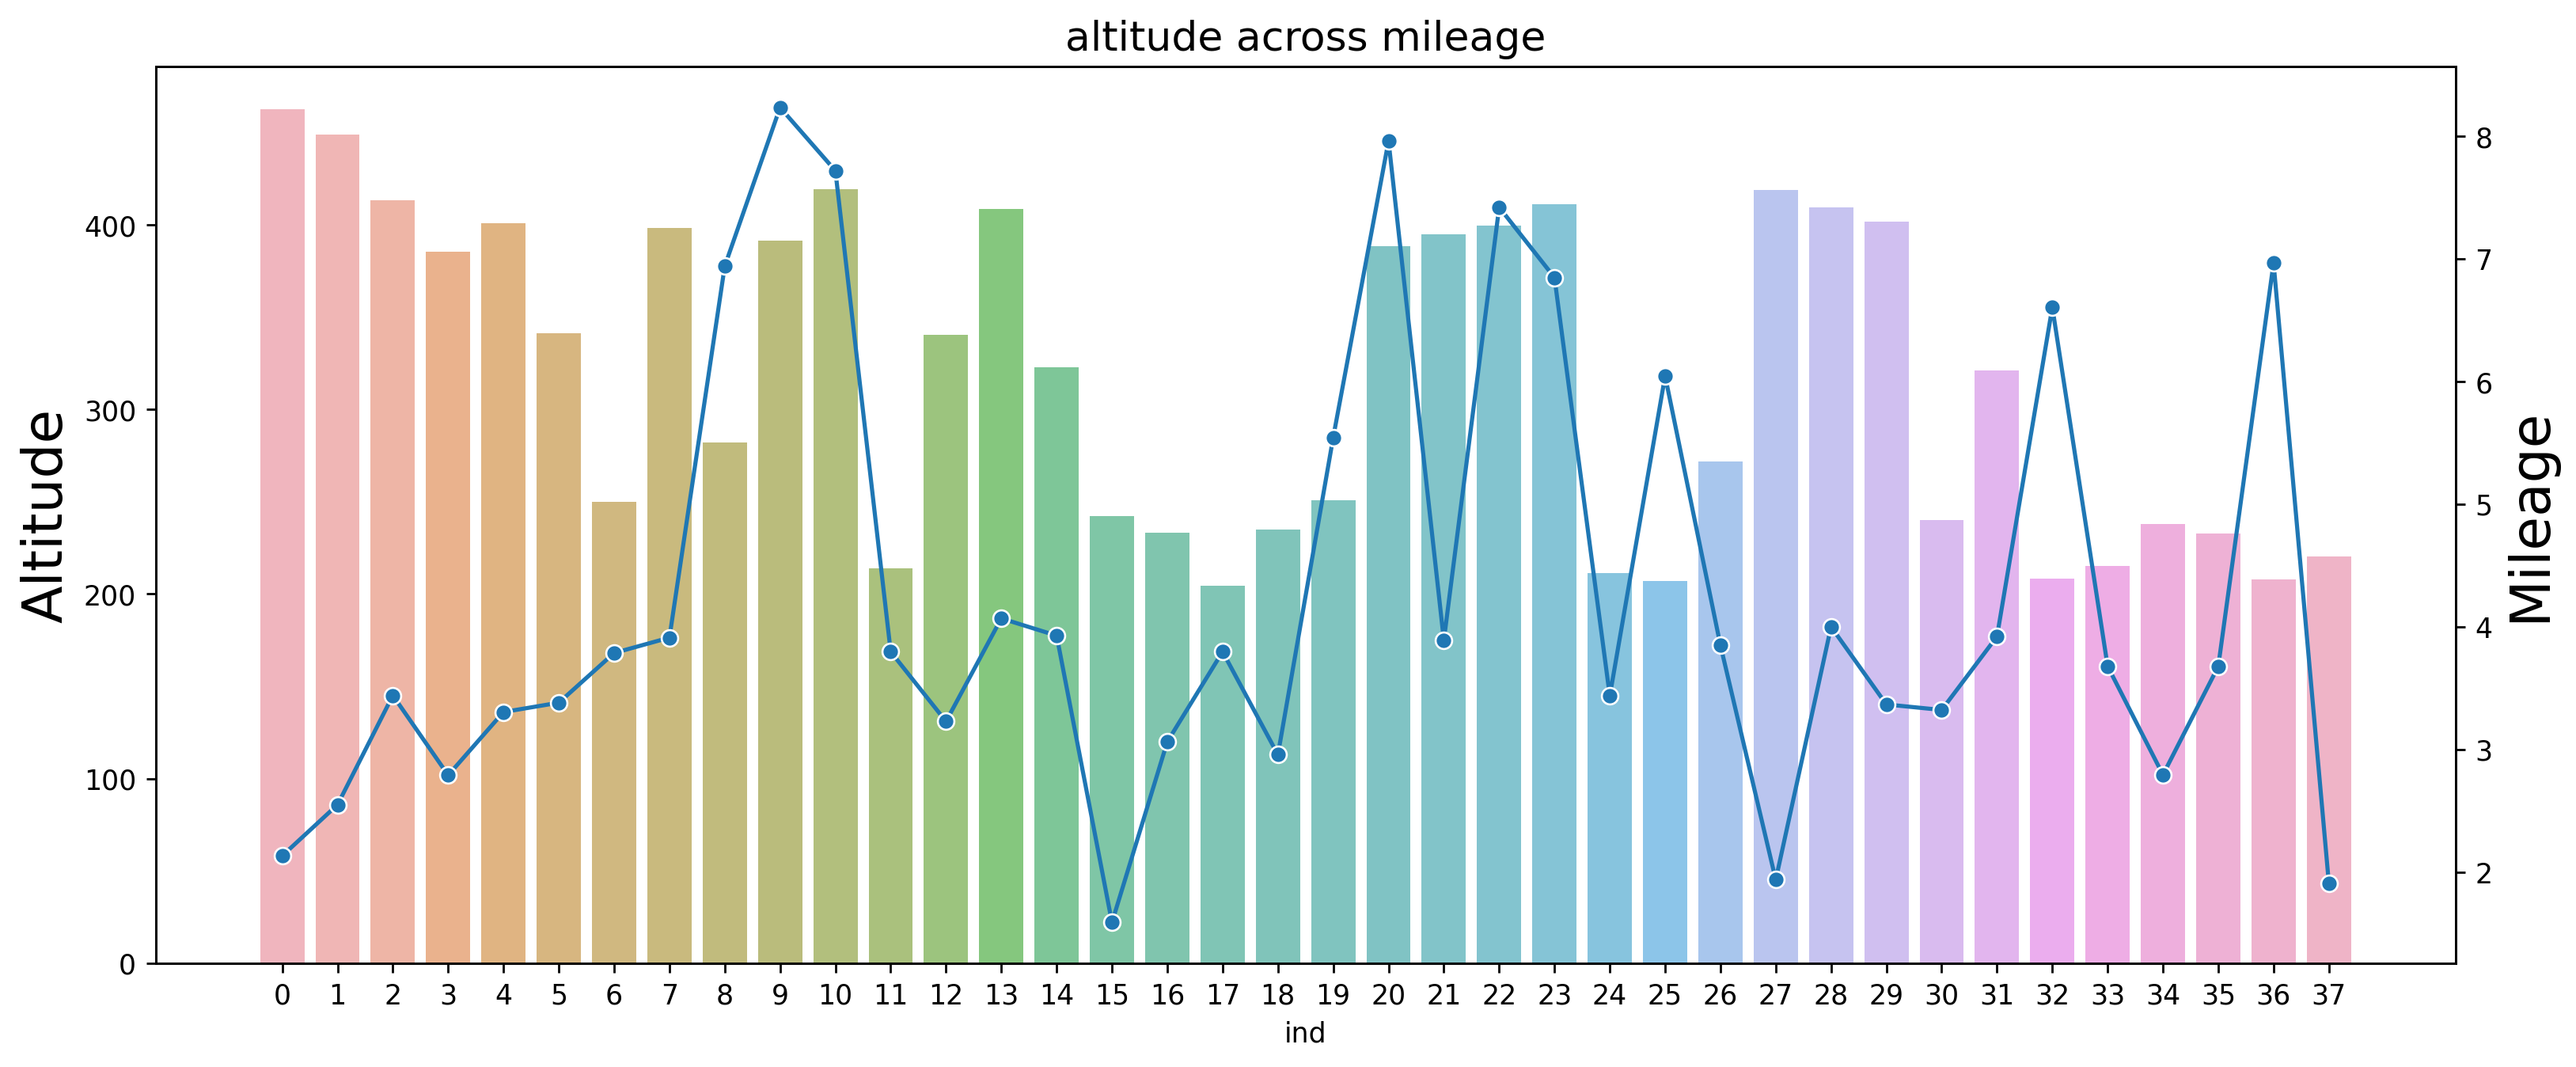

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dfg = pd.read_csv('time_gap_6hourss.csv')
#dfg.reset_index(drop=True, inplace=True)
dfg = dfg.set_index(['ind']).sort_index(level=[0,1])


fig, ax = plt.subplots(figsize=(15,6))

ax2  = ax.twinx()

v=sns.barplot(x=dfg.index.get_level_values('ind'),
            y=dfg.ALT,
            ax=ax, alpha=0.7)
v.set_ylabel("Altitude", fontsize = 20)
k=sns.lineplot(x=dfg.index.get_level_values('ind'),
            y=dfg.AFE,
            ax=ax2, marker='o', legend=None)
k.set_ylabel("Mileage", fontsize = 20)

ax.set_title('altitude across mileage', fontsize = 15)
plt.savefig('altitude across mileage')

In [51]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
split_data_sour= pd.read_csv('time_gap_6hourss.csv')
data__alt_range_wise=[]
afe_low=split_data_sour['AFE'].min()
afe_high=split_data_sour['AFE'].max()+1


afe_running_val=afe_low
range_afe=[]



#print(afe_low,afe_high)
while afe_running_val <= afe_high:
    range_afe.append(afe_running_val)
    afe_running_val+=1.3


loop_run=0

if (len(range_afe) % 2) == 0:
    loop_run=int(round(len(range_afe)))/2
else:
    range_afe.append(range_afe[-1]+1.3)
    loop_run=int(round(len(range_afe)))/2
    

#print(loop_run)
final_list=[]
range_spl=[]
range_mean=[]
range_alt_spl=[]
for ss in range(0,int(str(loop_run).split('.')[0])+2):
    if ss==0:
        ddds=split_data_sour.loc[(split_data_sour['AFE']>=range_afe[ss]) & (split_data_sour['AFE']<=range_afe[ss+1])]
        range_spl.append([range_afe[ss],range_afe[ss+1]])
        range_alt_spl.append([ddds['ALT'].min(),ddds['ALT'].max()])
        range_mean.append(ddds['AFE'].mean())
        #final_list.append([ddds['AFE'].to_list(),ddds['ALT'].to_list(),ddds['ODO'].to_list(),ddds['TFC'].to_list()])
        dts=ddds[['AFE','ALT','ODO','TFC']].reset_index()
        dts['ind']=dts.index
        #ll=[for ss in range(0,len(dts['ind']) if ss in dts['ind'].to_list()]
        if not dts.empty:
            range_spl.append([range_afe[ss]+0.01,range_afe[ss+1]])
            range_alt_spl.append([ddds['ALT'].min(),ddds['ALT'].max()])
            range_mean.append(ddds['AFE'].mean())
            final_list.append(dts)
        
    else:
        ddds=split_data_sour.loc[(split_data_sour['AFE']>=range_afe[ss]+0.1) & (split_data_sour['AFE']<=range_afe[ss+1])]
        
        #final_list.append([ddds['AFE'].to_list(),ddds['ALT'].to_list(),ddds['ODO'].to_list(),ddds['TFC'].to_list()])
        dts=ddds[['AFE','ALT','ODO','TFC']].reset_index()
        dts['ind']=dts.index
        #dts.index.name='ind'
        if not dts.empty:
            range_spl.append([range_afe[ss]+0.01,range_afe[ss+1]])
            range_alt_spl.append([ddds['ALT'].min(),ddds['ALT'].max()])
            range_mean.append(ddds['AFE'].mean())
            final_list.append(dts)
        #final_list.append(ddds[['AFE','ALT','ODO','TFC']].reset_index().index.name='ind')
print(final_list)
data_frame_mean= pd.DataFrame({'range_alt':range_alt_spl,'range_afe':range_spl,'mean':range_mean}).to_csv('range_afe_mean.csv')

[   index       AFE         ALT      ODO   TFC  ind
0      0  2.133333  462.495915   3200.0   1.5    0
1      1  2.549730  449.087362  47170.0  18.5    1
2      3  2.790169  385.201110  82310.0  29.5    2
3     15  1.590000  242.033571   1590.0   1.0    3
4     27  1.937647  419.020924  16470.0   8.5    4
5     34  2.793333  237.954992  29330.0  10.5    5
6     37  1.906571  220.131861  33365.0  17.5    6,     index       AFE         ALT        ODO     TFC  ind
0       2  3.440448  413.459825  1383060.0   402.0    0
1       4  3.305278  400.775326   178485.0    54.0    1
2       5  3.381368  341.055350   160615.0    47.5    2
3       6  3.786673  249.898471  2116750.0   559.0    3
4       7  3.911724  398.149285  2880985.0   736.5    4
5      11  3.796765  213.701905   129090.0    34.0    5
6      12  3.228447  340.214944   166265.0    51.5    6
7      13  4.068587  408.648775   187155.0    46.0    7
8      14  3.928416  322.980679  2182235.0   555.5    8
9      16  3.062222  232.97248

In [60]:
for sskk in range(0,len(final_list)):
    #print(final_list[sskk])
    fig, ax = plt.subplots(figsize=(15,6))
    ax2  = ax.twinx()
    v=sns.barplot(x=final_list[sskk]['ind'],
            y=final_list[sskk].ALT,
            ax=ax, alpha=0.7)
    
    v.set_ylabel("Altitude", fontsize = 20)
    k=sns.lineplot(x=final_list[sskk]['ind'],
            y=final_list[sskk].AFE,
            ax=ax2, marker='o', legend=None)
    k.set_ylabel("Mileage", fontsize = 20)
    ax.set_title('altitude_range'+' '+str(final_list[sskk]['ALT'].min())+' - '
                +str(final_list[sskk]['ALT'].max())+' across '+'mileage_range '+str(range_spl[sskk][0])
                +' - '+str(range_spl[sskk][1])+str(sskk),fontsize=15)
    plt.savefig('altitude_range'+' '+str(final_list[sskk]['ALT'].min())+' - '
                +str(final_list[sskk]['ALT'].max())+' across '+'mileage_range '+str(range_spl[sskk][0])
                +' - '+str(range_spl[sskk][1])+str(sskk)+'.png')
    plt.close()
plt.show()

In [ ]:
if ss==0:
        ddds=split_data_sour.loc[(split_data_sour['AFE']>=range_afe[ss]) & (split_data_sour['AFE']< range_afe[ss+1])]
        range_spl.append([range_afe[ss],range_afe[ss+1]])
        range_mean.append(ddds['AFE'].mean())
        final_list.append([ddds['AFE'].to_list(),ddds['ALT'].to_list(),ddds['ODO'].to_list(),ddds['TFC'].to_list()])
        #final_list.append(ddds[['AFE','ALT','ODO','TFC']].to_list())
    
    if ss%2 !=0:
        #print(ss)
        ddds=split_data_sour.loc[(split_data_sour['AFE']>=range_afe[ss+1]) & (split_data_sour['AFE']< range_afe[ss+2])]
        range_spl.append([range_afe[ss+1],range_afe[ss+2]])
        range_mean.append(ddds['AFE'].mean())
        final_list.append([ddds['AFE'].to_list(),ddds['ALT'].to_list(),ddds['ODO'].to_list(),ddds['TFC'].to_list()])

print(range_spl)

# Visualization of mileage across speed,distance,fuel and torque

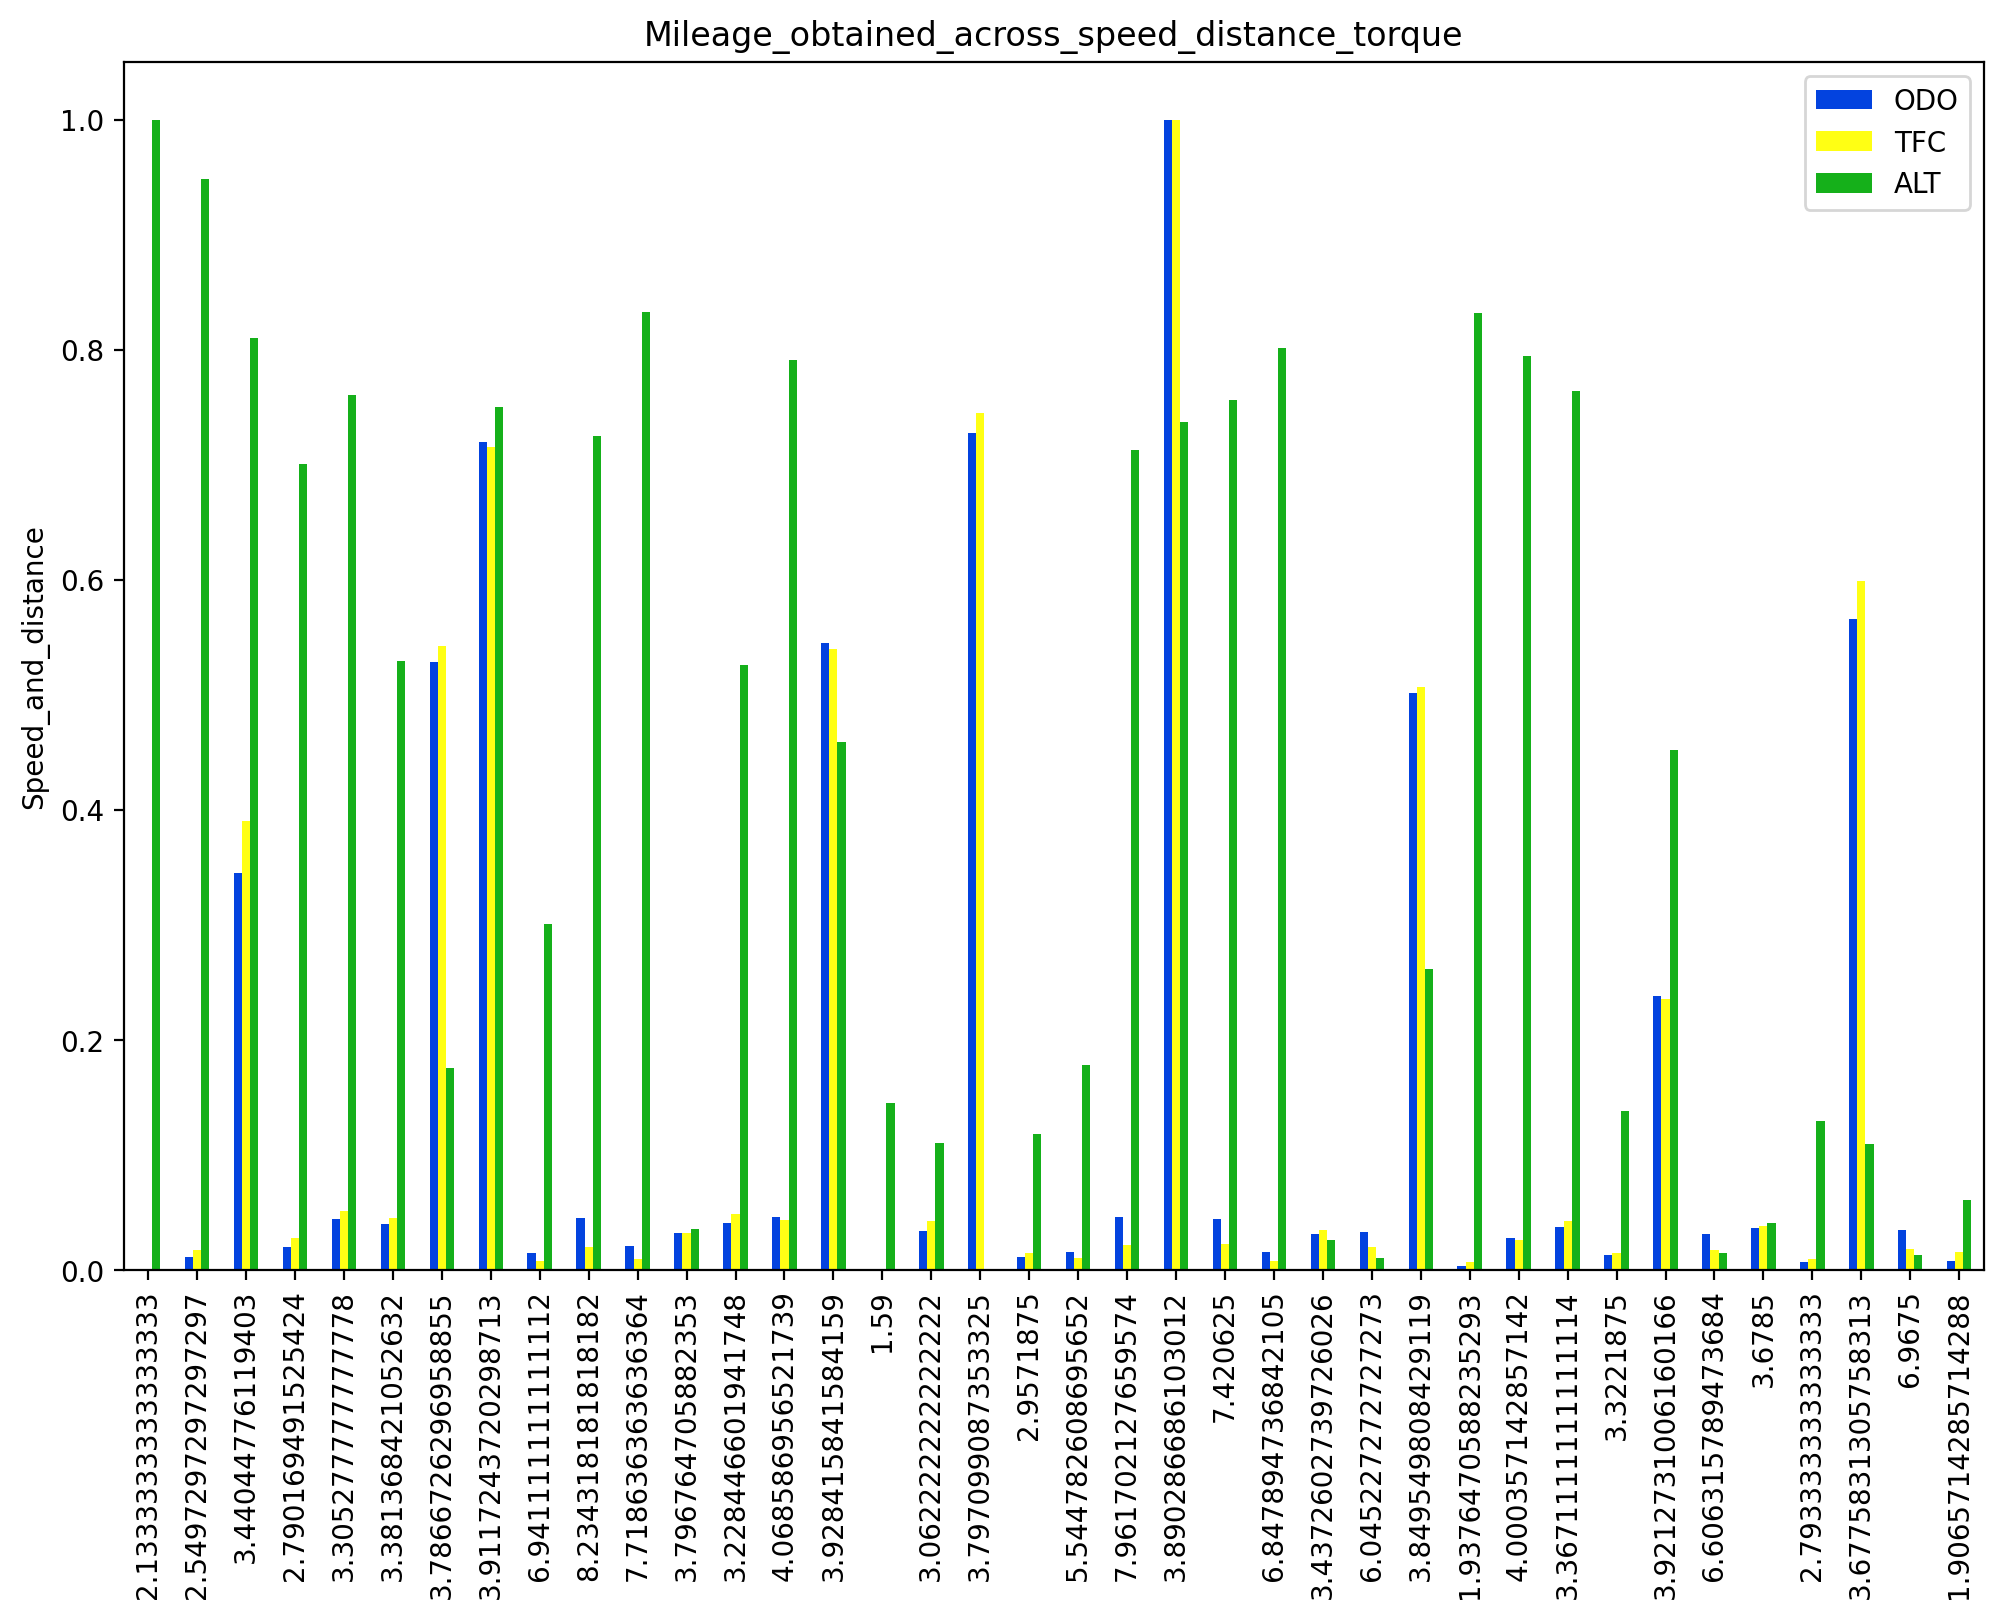

In [50]:
import plotly.graph_objects as go
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
# Some boilerplate to initialise things
from matplotlib.pyplot import figure


scaler = MinMaxScaler()
scaler_1= StandardScaler()

df=pd.read_csv('time_gap_6hourss.csv')
df[['ODO','TFC','ALT']]= scaler.fit_transform(
   df[['ODO','TFC','ALT']])
visual_data=df[['AFE','ODO','TFC','ALT']]


visual_data.to_csv('normalised_data_of_max.csv')

    

cmap = ListedColormap(['#0343df', '#e50000', '#ffff14','#929591','#15B01A'])

ax = visual_data.plot.bar(x='AFE', colormap=cmap)

ax.set_xlabel(None)
ax.set_ylabel('Speed_and_distance')
ax.set_title('Mileage_obtained_across_speed_distance_torque')
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 250 # 200 e.g. is really fine, but slower
plt.show()


#  XGBoost Machine Learning model traning and prediction on test data

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.metrics import explained_variance_score, r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score
import seaborn as sb

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')


data = pd.read_csv('time_gap_6hourss.csv')
data=data[['AFE','TFC','ODO']]
data.dropna(axis=0, subset=['AFE'], inplace=True)


y = data.AFE
X = data.drop(['AFE'], axis=1).select_dtypes(exclude=['object'])
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25)

#my_imputer = imputer()
train_X = imputer.fit_transform(train_X)
test_X = imputer.transform(test_X)

pd.DataFrame(train_X).to_csv('train_x.csv')
pd.DataFrame(test_X).to_csv('test_x.csv')


my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
my_model.fit(train_X, train_y, early_stopping_rounds=5, 
             eval_set=[(test_X, test_y)], verbose=False)


predictions = my_model.predict(test_X)
data_result=pd.DataFrame(list(test_X['TFC'].to_list(),zip(test_y.to_list(),list(predictions))),columns=['TFC','actual_mileage','predicted_mileage'])
data_result.to_csv('mileage_prediction_result.csv')

#print(list(predictions),'oringinal',test_y.to_list())

variance_scores=explained_variance_score(predictions,test_y)
absolute_mean_errors=mean_absolute_error(test_y,predictions)
mean_squared_errors=mean_squared_error(test_y,predictions,squared=True)


# Calculate the absolute errors
xg_errors = abs(predictions - test_y)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(xg_errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
xg_mape = 100 * (xg_errors / test_y)
# Calculate and display accuracy
xg_accuracy = 100 - np.mean(xg_mape)
print('Accuracy:', round(xg_accuracy, 2), '%.')

#print('mean_square_error_of random_forest',mean_squared_errors,'random_forest_variance',
#variance_scores,'random_forest_abs_mean_error',absolute_mean_errors)

#print("Mean Absolute Error : " + str(mean_squared_error(predictions, test_y)))



IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

# Descision tree model

In [ ]:
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(train_X, train_y)
y_pred = regressor.predict(test_X)
des_res=pd.DataFrame(list(zip(test_y.to_list(),list(y_pred))),columns=['actual_mileage','predicted_mileage'])
des_res.to_csv('des_mileage_prediction_result.csv')


# Calculate the absolute errors
des_errors = abs(y_pred - test_y)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(des_errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
des_mape = 100 * (des_errors / test_y)
# Calculate and display accuracy
des_accuracy = 100 - np.mean(des_mape)
print('Accuracy:', round(des_accuracy, 2), '%.')

#print("Mean Absolute Error : " + str(mean_squared_error(y_pred, test_y)))

# Randomforest model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_X, train_y)
rf_pred=rf.predict(test_X)
ran_res=pd.DataFrame(list(zip(test_y.to_list(),list(rf_pred))),columns=['actual_mileage','predicted_mileage'])
ran_res.to_csv('random_forest_mileage_prediction_result.csv')

# Calculate the absolute errors
errors = abs(rf_pred - test_y)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_y)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

# 13 days prediction results

In [ ]:


pro_data = pd.read_csv(r'/home/ezio/Documents/internal_data_manupulation (1)/testing_data/merged_data.csv')
print(len(pro_data))
pro_data['AFE']=pro_data['AFE'].astype('str')
pro_data=pro_data[pro_data['AFE']!='nan']
pro_data['AFE']=pro_data['AFE'].astype('float')
pro_data=pro_data[pro_data['AFE']!=pro_data['AFE'].max()]

pro_data['TFC']=pro_data['TFC'].astype('str')
pro_data=pro_data[pro_data['TFC']!='nan']
pro_data['TFC']=pro_data['TFC'].astype('float')

pro_data['ODO']=pro_data['ODO'].astype('str')
pro_data=pro_data[pro_data['ODO']!='nan']
pro_data['ODO']=pro_data['ODO'].astype('float')



pro_data=pro_data[['AFE','TFC','ODO']]
print(len(pro_data))

#pro_data=pro_data[['mileage','speed_avg','rpm_avg','distance_total','torque_avg']]
pro_data.dropna(axis=0, subset=['AFE'], inplace=True)

actual= pro_data.AFE

data_to_model=pro_data.drop(['AFE'], axis=1).select_dtypes(exclude=['object'])
clean_data_to_model=imputer.fit_transform(data_to_model)

pro_predictions = my_model.predict(clean_data_to_model)
pro_data_result=pd.DataFrame(list(zip(pro_data.TFC.tolist(),pro_data.ODO.tolist(),
                                      actual.to_list(),list(pro_predictions))),
                             columns=['TFC','ODO','actual_mileage_1','predicted_mileage_1'])



# Calculate the absolute errors
fin_errors = abs(pro_predictions - actual)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(fin_errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
fin_mape = 100 * (fin_errors / actual)
# Calculate and display accuracy
fin_accuracy = 100 - np.mean(fin_mape)
print('Accuracy:', round(fin_accuracy, 2), '%.')


pro_data_result.to_csv(r'fffffff_mileage_prediction_result.csv')


# Visualization of comparsion between actual and predicted mileage

# predicted mileage value

In [10]:
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt 
import plotly.express as px

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

data=pd.read_csv(r'mileage_prediction_result.csv')
data_act=data[['TFC', 'actual_mileage']]
data_act['class']='act'
data_act=data_act.rename(columns={'actual_mileage':'act_pre'})
data_pre=data[['TFC','predicted_mileage']]
data_pre['class']='pre'
data_pre=data_pre.rename(columns={'predicted_mileage':'act_pre'})
frame=[data_pre,data_act]
result = pd.concat(frame)
#print(result.tail(10))
#data_2=pd.read_csv('test_x.csv')
#frame=[data,data_2]
#data_3=pd.concat(frame,axis=1)
#data_3[['speed_1','actual_mileage_1','predicted_mileage_1']]=scaler.fit_transform(data_3[['speed','actual_mileage','predicted_mileage']])
#data_3.to_csv('prediction_visualize.csv')
fig = px.scatter(result, x="TFC", y="act_pre", marginal_y="violin",color='class',
           marginal_x="box", trendline="ols", template="simple_white")


#'actual_mileage'
#'predicted_mileage'
fig.show()

In [ ]:
sb.lmplot(x = 'speed_1',
            y = 'predicted_mileage_1', 
            ci = None,
            data = data)

# actual mileage value

In [ ]:
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt 

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

data=pd.read_csv(r'/home/ezio/Documents/internal_data_manupulation (1)/testing_data/merged_data.csv')

#data_2=pd.read_csv('test_x.csv')
#frame=[data,data_2]
#data_3=pd.concat(frame,axis=1)
#data_3[['speed_1','actual_mileage_1','predicted_mileage_1']]=scaler.fit_transform(data_3[['speed','actual_mileage','predicted_mileage']])
#data_3.to_csv('prediction_visualize.csv')


sb.lmplot(x = 'ODO',
            y = 'T', 
            ci = None,
            data = data)
#'actual_mileage'
#'predicted_mileage'
plt.show()






In [ ]:
datas=data[(np.abs(stats.zscore(data)) < 3).all(axis=1)]


datas.reset_index(inplace=True) 

print(len(datas))

In [ ]:


dt_data=pd.to_datetime(data['T'])
TFC_data=data['TFC'].astype('str')            
start_index=0
#hour=[00,23]
#min=[00,59]
end_index=0
c=0
s=[]
e=[]
start_time=0
end_time=0
time_split_data=[]
for kk in range(0,len(dt_data)):
    #print(TFC_data[kk])
    if str(TFC_data[kk])!='nan':
        c+=1
        #print(c,'c')
    if str(TFC_data[kk]) != 'nan' and c==1:
        
        start_time=dt_data[kk]
        #print(start_time,'pppp')
        start_index=kk
        s.append(start_index)
    else:
        end_time=dt_data[kk]
        #print(start_time,'llll',end_time)
        if start_time!=0:
            dif=end_time-start_time
            #print(dif)
            h=abs(int(str(dif).split(' ')[2].split(':')[0]))
            #print(start_time,end_time,h)
            if h >=6 and str(TFC_data[kk]) != 'nan':

                end_index=kk

                time_split_data.append([data['TFC'][end_index]-data['TFC'][start_index],
                                           data['ODO'][end_index]-data['ODO'][start_index]])

                e.append(end_index)
                c=0
                                    

time_6_split=pd.DataFrame(time_split_data,columns=['TFC','ODO'])
                                    
time_6_split.to_csv('time_gap_6hour.csv')
print(s[:10],e[:10])   

In [ ]:
#Removing Outlier and cleaning
data['AFE']=data['AFE'].astype('str')
cleaned_pat_data=data[data['AFE']!='nan']
cleaned_pat_data['AFE']=cleaned_pat_data['AFE'].astype('float')
cleaned_pat_data=cleaned_pat_data[cleaned_pat_data['AFE']<9]
print(len(cleaned_pat_data))
cleaned_pat_data=cleaned_pat_data.drop_duplicates(subset='AFE')
print(len(cleaned_pat_data))




#selecting required_data
pattern_data=cleaned_pat_data[['AFE','T','TFC','RPM','CSP','ANR','ODO']]
pattern_data.to_csv('negative_torque.csv')


#pattern_data=pattern_data[pattern_data['ODO']!='nan']

#removing negative Torque
#pattern_data=pattern_data[pattern_data['ANR']>0].reset_index(drop=True)


'''
#getting actually distance
pattern_data['ODO']=pattern_data['ODO'].astype('float')
pattern_data['ODO']=pattern_data['ODO']-pattern_data['ODO'].iloc[0]

#removing null records from data
ind_mileage_without_null=pattern_data.index[pattern_data['AFE']!='nan'].tolist()

#saving modified data
pattern_data['AFE']=pattern_data['AFE'].astype('float')
pattern_data.to_csv('pattern_data.csv')

final_mileage_ind=[2]
ll=[0]

#getting index for slicing
try:
    for ss in range(1,len(ind_mileage_without_null)):
        #print(ind_mileage_without_null[ss]-ind_mileage_without_null[ss+1])
        if abs(ind_mileage_without_null[ss]-ind_mileage_without_null[ss+1]) >1:
            if ll[-1]==ind_mileage_without_null[ss]:
                #final_mileage_ind.append(ind_mileage_without_null[ss])
                final_mileage_ind.append(ind_mileage_without_null[ss]+1)
            else:
                final_mileage_ind.append(ind_mileage_without_null[ss])
                final_mileage_ind.append(ind_mileage_without_null[ss]+1)
        else:
                final_mileage_ind.append(ind_mileage_without_null[ss])
                ll.append(ind_mileage_without_null[ss]+1)
except Exception:
    print('eeror')
     

final_mileage_ind=sorted(list(set(final_mileage_ind[:])-set(ll[1:])))

#print(len(final_mileage_ind[:-1]))

length_to_split=[2 for ss in range(0,round((int(len(final_mileage_ind[:-1])))/2))]

#print((len(final_mileage_ind)-1)/2)

#print(len(length_to_split))
input=iter(final_mileage_ind)
final_mileage_ind_split=[list(islice(input, elem)) for elem in length_to_split]
#print(ind_mileage_without_null[:40])
#print(ll)

speed_avg.append(pattern_data['CSP'][ind_mileage_without_null[0]])
rpm_avg.append(pattern_data['RPM'][ind_mileage_without_null[0]])
distance.append(pattern_data['ODO'][ind_mileage_without_null[0]])
mileage.append(pattern_data['AFE'][ind_mileage_without_null[0]])
fuel_total.append(pattern_data['TFC'][ind_mileage_without_null[0]])
engine_torque.append(pattern_data['ANR'][ind_mileage_without_null[0]])

#print(final_mileage_ind)
for ss in final_mileage_ind_split:
    if 11491 in ss:
        print('14681',ss,pattern_data['CSP'][ss[0]:ss[1]+1].mean()) #
    if 14710 in ss:
        print('14710',pattern_data['CSP'][ss[0]:ss[1]+1].mean())
    
    speed_avg.append(pattern_data['CSP'][ss[0]:ss[1]+1].mean())
    rpm_avg.append(pattern_data['RPM'][ss[0]:ss[1]+1].mean())
    distance.append(pattern_data['ODO'][ss[0]:ss[1]+1].sum())
    fuel_total.append(pattern_data['TFC'][ss[0]:ss[1]+1].sum())
    engine_torque.append(pattern_data['ANR'][ss[0]:ss[1]+1].mean())
    mileage.append(pattern_data['AFE'][ss[1]])
    
for kk in ll[1:]:
    speed_avg.append(pattern_data['CSP'][kk])
    mileage.append(pattern_data['AFE'][kk])
    rpm_avg.append(pattern_data['RPM'][kk])
    fuel_total.append(pattern_data['TFC'][kk])
    distance.append(pattern_data['ODO'][kk])
    engine_torque.append(pattern_data['ANR'][kk])

pattern_use=pd.DataFrame(list(zip(mileage[:],speed_avg[:],rpm_avg[:],distance[:],fuel_total[:],engine_torque[:])),columns=['mileage','speed_avg', 'rpm_avg','distance_total','fule_total','torque_avg'])
pattern_use.to_csv('consolidation_speed_avg_mileage.csv')

group=pattern_use.groupby('mileage')
maxx=group.max()
maxx.to_csv('delet.csv')
#print(final_mileage_ind_split[:5])
'''